# Coursework B

# **Effect of Noise on MNIST Classification**

## **Introduction**
This notebook investigates how adding random noise to the MNIST dataset affects the performance of a neural network classifier. The main objectives are:

1. Implement a function to add random uniform noise to the MNIST dataset.
2. Visualize images with different noise levels.
3. Train a neural network on the original MNIST dataset and evaluate its performance.
4. Test the trained network on noisy MNIST images and analyze the effect of noise on classification accuracy.
5. Retrain the neural network on noisy data and determine the best noise level to maximize classification performance.

---

## **1. Define a Function to Add Noise to Images**
We create a function `addNoiseToMNIST(yNoise, data)` that adds random uniform noise to each pixel, ensuring pixel values do not exceed 255.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to add noise to MNIST images
def addNoiseToMNIST(yNoise, data):
    """
    Adds random noise to MNIST images while ensuring pixel values do not exceed 255.
    (Corresponds to: "Write a function with the definition def addNoiseToMNIST(yNoise,data)...")
    
    Parameters:
    yNoise (float): Maximum noise level to be added to each pixel.
    data (numpy.ndarray): Input MNIST image data.
    
    Returns:
    numpy.ndarray: Noisy MNIST image data.
    """
    noise = np.random.uniform(0, yNoise, size=data.shape)
    noisy_data = np.clip(data + noise, 0, 255)  # Ensure values stay within [0, 255]
    return noisy_data


## **2. Load the MNIST Dataset**
We begin by loading the MNIST dataset from `torchvision.datasets` and normalizing the images.


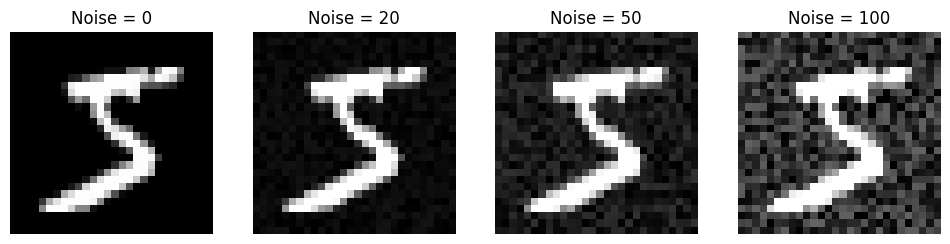

[5 0 4 1 9 2 1 3 1 4]


In [24]:
# Load MNIST dataset (Relevant to loading raw MNIST images)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1] (Preprocessing step before training)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add noise with different yNoise values and plot an image (Corresponds to "Plot an image from the MNIST dataset...")
noise_levels = [0, 20, 50, 100]
fig, axes = plt.subplots(1, len(noise_levels), figsize=(12, 3))

for i, noise in enumerate(noise_levels):
    noisy_image = addNoiseToMNIST(noise, x_train[0] * 255) / 255.0
    axes[i].imshow(noisy_image, cmap='gray')
    axes[i].set_title(f"Noise = {noise}")
    axes[i].axis('off')
plt.show()

## **3. Train a Neural Network on the Clean MNIST Dataset**
We define and train a simple convolutional neural network (CNN) on the original MNIST dataset without noise.


In [19]:
# Build a neural network model (Corresponds to "Train a neural network to classify the images...")
def build_model():
    """
    Builds and compiles a neural network model for MNIST classification.
    
    Returns:
    tensorflow.keras.Model: Compiled neural network model.
    """
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Train and evaluate the model
model = build_model()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

# Function to evaluate the model performance
def evaluate_model(model, x_test, y_test):
    """
    Evaluates the trained model on the test dataset and prints the accuracy.
    
    Parameters:
    model (tensorflow.keras.Model): Trained neural network model.
    x_test (numpy.ndarray): Test images.
    y_test (numpy.ndarray): True labels for test images.
    
    Returns:
    float: Test accuracy.
    """
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test accuracy: {test_acc:.4f}")
    return test_acc

# Evaluate test accuracy (Final step to confirm acceptable model performance)
evaluate_model(model, x_test, y_test)


Epoch 1/10


/Users/Shared/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8603 - loss: 0.5054 - val_accuracy: 0.9516 - val_loss: 0.1648
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.9566 - loss: 0.1507 - val_accuracy: 0.9637 - val_loss: 0.1180
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9722 - loss: 0.0952 - val_accuracy: 0.9715 - val_loss: 0.0965
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 872us/step - accuracy: 0.9791 - loss: 0.0708 - val_accuracy: 0.9749 - val_loss: 0.0858
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.9842 - loss: 0.0536 - val_accuracy: 0.9750 - val_loss: 0.0805
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.9876 - loss: 0.0432 - val_accuracy: 0.9756 - val_loss: 0.0816
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9894 - loss: 0.0367 - val_accuracy: 0.9752 - val_loss: 0.0768
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.9913 - loss: 0.0296 - val_accuracy:

0.9790999889373779

## **4. Test the Model on Noisy Images**
Now, we evaluate the trained model on MNIST images with different noise levels and plot test accuracy vs noise level.


313/313 - 0s - 341us/step - accuracy: 0.9791 - loss: 0.0751
Test accuracy: 0.9791
313/313 - 0s - 356us/step - accuracy: 0.9791 - loss: 0.0751
Test accuracy: 0.9791
313/313 - 0s - 345us/step - accuracy: 0.9772 - loss: 0.0805
Test accuracy: 0.9772
313/313 - 0s - 344us/step - accuracy: 0.9700 - loss: 0.1027
Test accuracy: 0.9700
313/313 - 0s - 342us/step - accuracy: 0.9536 - loss: 0.1590
Test accuracy: 0.9536
313/313 - 0s - 346us/step - accuracy: 0.9020 - loss: 0.3056
Test accuracy: 0.9020
313/313 - 0s - 344us/step - accuracy: 0.8252 - loss: 0.5937
Test accuracy: 0.8252
313/313 - 0s - 340us/step - accuracy: 0.7573 - loss: 1.0241
Test accuracy: 0.7573
313/313 - 0s - 343us/step - accuracy: 0.7013 - loss: 1.5310
Test accuracy: 0.7013
313/313 - 0s - 339us/step - accuracy: 0.6472 - loss: 2.1368
Test accuracy: 0.6472
313/313 - 0s - 341us/step - accuracy: 0.6038 - loss: 2.7442
Test accuracy: 0.6038
313/313 - 0s - 342us/step - accuracy: 0.5717 - loss: 3.3989
Test accuracy: 0.5717


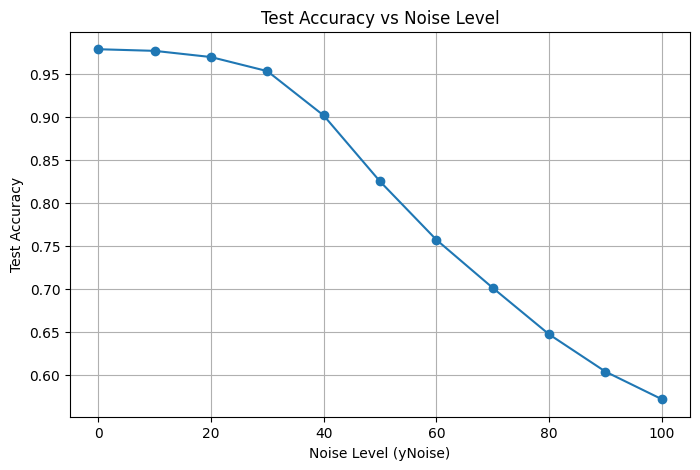

In [20]:
# Evaluate test accuracy (Final step to confirm acceptable model performance)
evaluate_model(model, x_test, y_test)

# Evaluate model performance with different noise levels (Corresponds to "Plot of test accuracy vs yNoise")
noise_levels = np.arange(0, 110, 10)
accuracies = []

for noise in noise_levels:
    noisy_x_test = addNoiseToMNIST(noise, x_test * 255) / 255.0
    acc = evaluate_model(model, noisy_x_test, y_test)
    accuracies.append(acc)

# Plot test accuracy vs yNoise
plt.figure(figsize=(8,5))
plt.plot(noise_levels, accuracies, marker='o', linestyle='-')
plt.xlabel("Noise Level (yNoise)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Noise Level")
plt.grid(True)
plt.show()

## **5. Retrain the Model with Noisy Training Data**
Now, we retrain the network using noisy training images and repeat the previous test.


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8419 - loss: 0.5624 - val_accuracy: 0.9257 - val_loss: 0.2517
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.9459 - loss: 0.1881 - val_accuracy: 0.9507 - val_loss: 0.1638
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.9621 - loss: 0.1351 - val_accuracy: 0.9620 - val_loss: 0.1242
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.9709 - loss: 0.0983 - val_accuracy: 0.9631 - val_loss: 0.1196
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.9786 - loss: 0.0758 - val_accuracy: 0.9634 - val_loss: 0.1140
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9825 - loss: 0.0588 - val_accuracy: 0.9658 - val_loss: 0.1081
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.9862 - loss: 0.0461 - val_accuracy: 0.9690 - val_loss: 0.0958
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.9884 - loss: 0.0394 - va

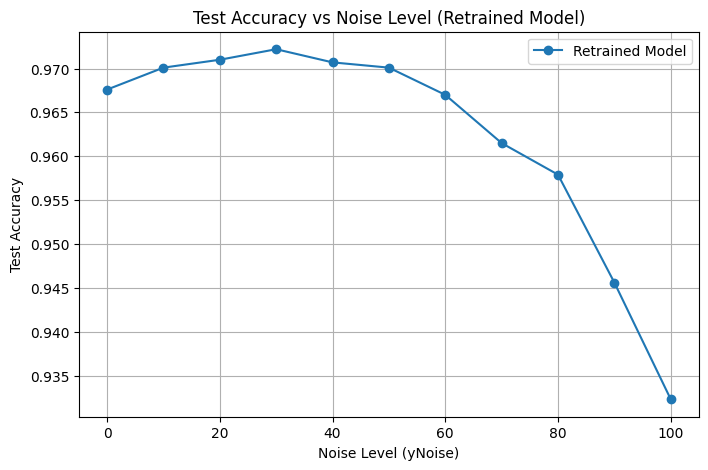

In [21]:
# Add noise to training data and retrain the model (Corresponds to "Retrain the network with noise added")
train_noise_level = 50  # Define noise level to be added to training data
noisy_x_train = addNoiseToMNIST(train_noise_level, x_train * 255) / 255.0

# Train and evaluate the new model
model_noisy = build_model()
history_noisy = model_noisy.fit(noisy_x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)


# Evaluate test accuracy for the newly trained model
evaluate_model(model_noisy, x_test, y_test)

# Evaluate model performance with different noise levels (Corresponds to "Plot of test accuracy vs yNoise")
noise_levels = np.arange(0, 110, 10)
accuracies_noisy = []

for noise in noise_levels:
    noisy_x_test = addNoiseToMNIST(noise, x_test * 255) / 255.0
    acc = evaluate_model(model_noisy, noisy_x_test, y_test)
    accuracies_noisy.append(acc)

# Plot test accuracy vs yNoise for the retrained model
plt.figure(figsize=(8,5))
plt.plot(noise_levels, accuracies_noisy, marker='o', linestyle='-', label='Retrained Model')
plt.xlabel("Noise Level (yNoise)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Noise Level (Retrained Model)")
plt.grid(True)
plt.legend()
plt.show()


What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?